<a href="https://colab.research.google.com/github/wdwzyyg/ECE532Project/blob/main/FeatureExtraction_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os
import sys
import matplotlib.pyplot as plt
from PIL import Image
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from keras import callbacks
from keras import optimizers
from keras.callbacks import EarlyStopping
from keras import backend as K
import tensorflow as tf
import numpy as np
import scipy.io as sio

import time
from google.colab import output

tf.test.gpu_device_name()

'/device:GPU:0'

In [19]:
# Define the label: Food: 1 | Peole: 2 | Scenery: 3

batch_size = 32 # total number of training file must be integer times of batch_size
input_base = '/content/drive/MyDrive/ECE532/Project/Input/'
input_sub_folder = ['Food/','People/','Scenery/']    
result_path =  '/content/drive/MyDrive/ECE532/Project/Featurization Result/'

x_train_list = []
y_train_list = []

start_time = time.time()

for current_folder in input_sub_folder:

  input_folder = input_base + current_folder

  for image in os.listdir(input_folder):
    if (current_folder == 'Food/'):
      label = 0
    else:
      if (current_folder == 'People/'):
        label = 1
      else:
        label = 2

    img = Image.open(input_folder + image)
    img = np.asarray(img,dtype=np.float64)[:,:,0]
    img_size = img.shape[0]
    sx, sy = img.shape[0], img.shape[1]
    new_channel = np.zeros((img_size, img_size))
    img_stack = np.dstack((img, new_channel, new_channel)) # add channel axis
    x_train_list.append(img_stack)
    y_train_list.append(label)

nb_train_samples = len(x_train_list)
print('Image loaded')
print('input shape: ')
print(sx, sy)
print('training number: ')
print(nb_train_samples)
nb_class = len(set(y_train_list))
x_train = np.asarray(x_train_list) # turn the list into array

y_train = to_categorical(y_train_list, num_classes=nb_class) # turn into label vectors
print('Size of image array in MB')
print(x_train.nbytes/1024/1024)
np.save(result_path + 'y_train.npy', y_train)
np.save(result_path + 'raw_y_train.npy', np.asarray(y_train_list))

save_bottleneck_features(x_train, y_train, batch_size, nb_train_samples,result_path)
print('Total computing time is: ')
print(int((time.time() - start_time) * 100) / 100.0,'s')

output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()') # sound notification when finished

Image loaded
input shape: 
100 100
training number: 
1632
Size of image array in MB
373.53515625
219062272/219055592 [==============================] - 4s 0us/step
before featurewise center
made it past featurewise center
made it past generator
made it past the bottleneck features
Total computing time is: 
20.04 s


In [6]:
feature = np.load('/content/drive/MyDrive/ECE532/Project/Featurization Result/bottleneck_features_train.npy')
# for 1632 samples, each has 2048 features of a 3x3 matrix

flattened_features = feature.reshape(-1, *feature.shape[:3])[0]
# After flattened, for 1632 samples, each has 2048 features of a 9x1 vector


# Aux function

In [18]:
def save_bottleneck_features(x_train, y_train, batch_size, nb_train_samples,result_path):
    # Xception, VGG19, VGG16, InceptionV3, MobileNet, InceptionResNetV2
    name = 'InceptionResNetV2'
    model = applications.InceptionResNetV2(include_top=False, weights='imagenet')

    print('before featurewise center')
    
    datagen = ImageDataGenerator(   # DATA AUGAMENTATION
        featurewise_center=True,
        rotation_range=180,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=1,
        vertical_flip=1,
        shear_range=0.05)

    datagen.fit(x_train)
    print('made it past featurewise center')
    generator = datagen.flow(
        x_train,
        y_train,
        batch_size=batch_size,
        shuffle=False)
    print('made it past generator')

    bottleneck_features_train = model.predict_generator(
        generator, nb_train_samples // batch_size)
    print('made it past the bottleneck features')
    np.save(result_path + 'features_' + name + '.npy',
            bottleneck_features_train)

In [8]:
DIR = '/content/drive/MyDrive/ECE532/Project/Input/Scenery/'
print (len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

506


Figure 1 

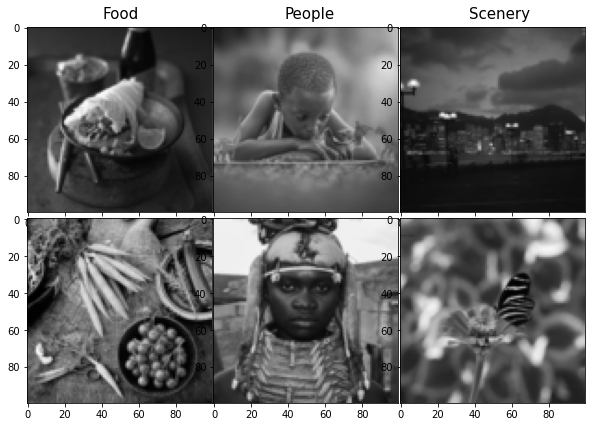

In [23]:
f1 = Image.open('/content/drive/MyDrive/ECE532/Project/Input/Food/100.tif')
f2 = Image.open('/content/drive/MyDrive/ECE532/Project/Input/Food/200.tif')
p1 = Image.open('/content/drive/MyDrive/ECE532/Project/Input/People/100.tif')
p2 = Image.open('/content/drive/MyDrive/ECE532/Project/Input/People/200.tif')
s1 = Image.open('/content/drive/MyDrive/ECE532/Project/Input/Scenery/100.tif')
s2 = Image.open('/content/drive/MyDrive/ECE532/Project/Input/Scenery/200.tif')

fig = plt.figure(figsize=(10,7)) # first width second length
fig.tight_layout() 

ax1 = fig.add_subplot(231)
ax1.imshow(f1)
ax1.text(60, -5, 'Food',fontsize = 15,ha='right')


ax2 = fig.add_subplot(232)
ax2.imshow(p1)
ax2.text(65, -5, 'People',fontsize = 15,ha='right')

ax3 = fig.add_subplot(233)
ax3.imshow(s1)
ax3.text(70, -5, 'Scenery',fontsize = 15,ha='right')


ax4 = fig.add_subplot(234)
ax4.imshow(f2)



ax5 = fig.add_subplot(235)
ax5.imshow(p2)


ax6 = fig.add_subplot(236)
ax6.imshow(s2)

plt.subplots_adjust(wspace=0.01, hspace=0.01)
plt.show()
fig.savefig('/content/drive/My Drive/fig1.tif',dpi = 400)